# **EJEMPLO 1 TENSOR FLOW**

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras import datasets

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
y_train = y_train.flatten()
y_test = y_test.flatten()

0


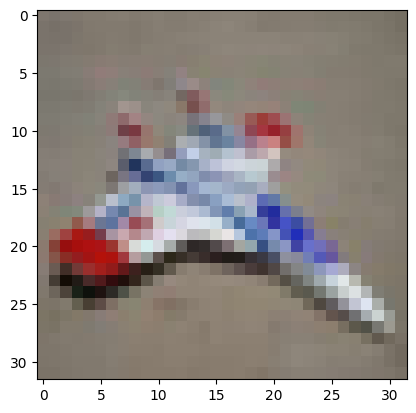

In [ ]:
plt.imshow(x_train[30])
print(y_train[30])

In [ ]:
name = [
    'avión',
    'automóvil',
    'ave',
    'gato',
    'ciervo',
    'perro',
    'rana',
    'caballo',
    'barco',
    'camión'
    ]

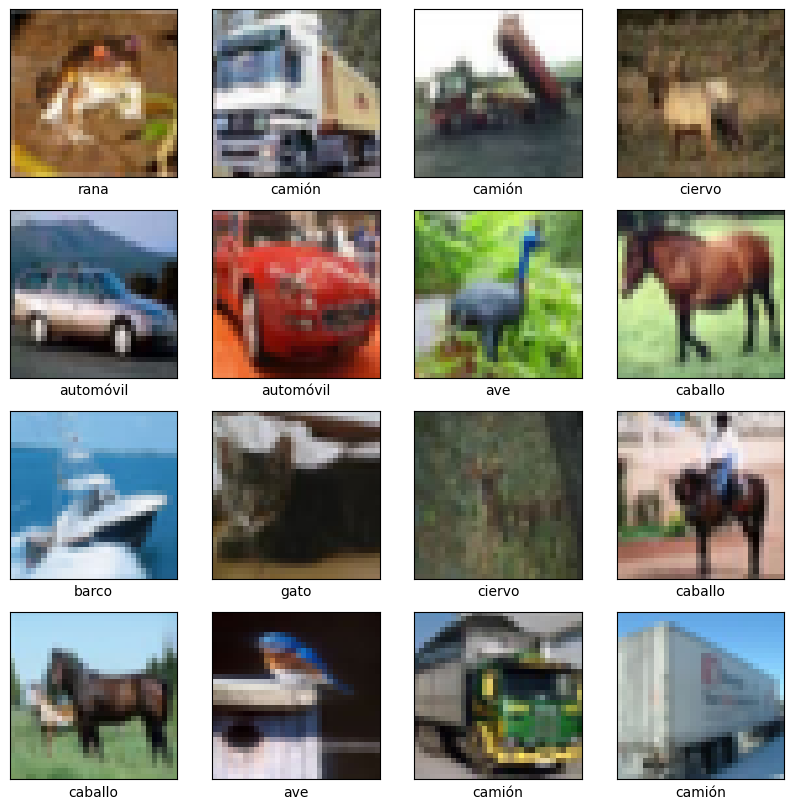

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(x_train[i])
  plt.xlabel(name[y_train[i]])
  plt.xticks([])
  plt.yticks([])

In [ ]:
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

In [ ]:
x_train=x_train / 255.0
x_test=x_test / 255.0

In [ ]:
import tensorflow as tf

In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import optimizers

In [ ]:
num_classes = 10

model = Sequential()
model.add(Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizers.RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [ ]:
batch_size = 32
epochs = 50

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size= batch_size,
                    epochs= epochs,
                    validation_data= (x_test, y_test))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - acc: 0.2402 - loss: 2.0520 - val_acc: 0.4331 - val_loss: 1.5849
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.4203 - loss: 1.5940 - val_acc: 0.4977 - val_loss: 1.4141
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.4860 - loss: 1.4314 - val_acc: 0.5128 - val_loss: 1.3701
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.5330 - loss: 1.3116 - val_acc: 0.5472 - val_loss: 1.2685
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.5679 - loss: 1.2273 - val_acc: 0.6142 - val_loss: 1.0982
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - acc: 0.5922 - loss: 1.1568 - val_acc: 0.6184 - val_loss: 1.0865
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.6125 - loss: 1.1072 - val_acc: 0.6388 - val_loss: 1.0269
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.6266 - loss: 1.0693 - val_acc: 0.6626 - val_loss: 0.9667
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━

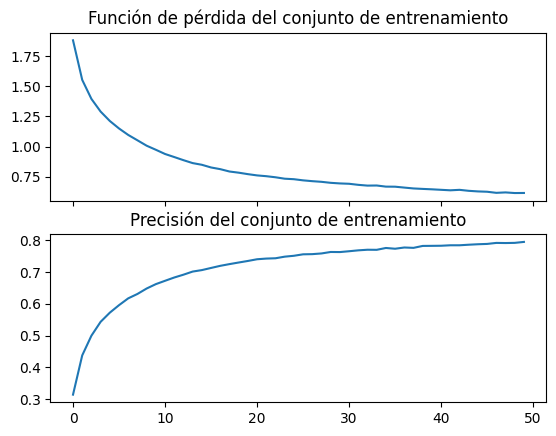

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(history.history['loss'])
ax1.set_title('Función de pérdida del conjunto de entrenamiento')
ax2 = fig.add_subplot(2,1,2, sharex= ax1)
ax2.plot(history.history['acc'])
ax2.set_title('Precisión del conjunto de entrenamiento')

plt.setp(ax1.get_xticklabels(), visible=False)

plt.show()

# **EJEMPLO 2 PYTHORCH**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# 1. CONFIGURACIÓN DE DISPOSITIVO
# Configura el dispositivo para usar GPU si está disponible, de lo contrario usa CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 2. CARGA Y PREPROCESAMIENTO DE DATOS
# Define las transformaciones para los datos (conversión a tensores y normalización)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convierte imágenes a tensores
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normaliza las imágenes
])

# Carga del conjunto de entrenamiento con transformaciones
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # DataLoader para iterar sobre los datos

# Carga del conjunto de prueba con transformaciones
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 170M/170M [00:03<00:00, 43.9MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# 3. DEFINICIÓN DE LA CNN
# Define una red neuronal convolucional simple
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)  # Primera capa convolucional
        self.relu1 = nn.ReLU()  # Activación ReLU
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Capa de pooling
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # Segunda capa convolucional
        self.relu2 = nn.ReLU()  # Activación ReLU
        self.fc1 = nn.Linear(64 * 8 * 8, 512)  # Capa completamente conectada
        self.fc2 = nn.Linear(512, 10)  # Capa de salida para 10 clases

    def forward(self, x):
        x = self.pool(self.relu1(self.conv1(x)))  # Paso por la primera capa
        x = self.pool(self.relu2(self.conv2(x)))  # Paso por la segunda capa
        x = x.view(-1, 64 * 8 * 8)  # Aplanamiento del tensor para las capas completamente conectadas
        x = self.fc1(x)  # Paso por la primera capa completamente conectada
        x = self.fc2(x)  # Paso por la capa de salida
        return x

# Instancia del modelo y transferencia al dispositivo
model = SimpleCNN().to(device)


In [ ]:
# 4. DEFINICIÓN DE PÉRDIDA Y OPTIMIZADOR
# Define la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()  # Pérdida para clasificación multiclase
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizador Adam

In [ ]:
# 5. ENTRENAMIENTO DEL MODELO
# Definición de parámetros de entrenamiento
epochs = 5  # Número de épocas
train_losses = []  # Lista para almacenar la pérdida de entrenamiento
test_losses = []  # Lista para almacenar la pérdida de prueba

for epoch in range(epochs):
    model.train()  # Modo de entrenamiento
    running_loss = 0.0
    for images, labels in train_loader:  # Itera sobre lotes de datos de entrenamiento
        images, labels = images.to(device), labels.to(device)  # Transfiere los datos al dispositivo

        optimizer.zero_grad()  # Resetea los gradientes
        outputs = model(images)  # Pasa los datos por el modelo
        loss = criterion(outputs, labels)  # Calcula la pérdida
        loss.backward()  # Propagación hacia atrás
        optimizer.step()  # Actualización de pesos

        running_loss += loss.item()  # Acumula la pérdida

    train_losses.append(running_loss / len(train_loader))  # Calcula la pérdida media de la época

    # Evaluación
    model.eval()  # Modo de evaluación
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():  # No se calculan gradientes durante la evaluación
        for images, labels in test_loader:  # Itera sobre los datos de prueba
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # Predicciones del modelo
            loss = criterion(outputs, labels)  # Calcula la pérdida
            test_loss += loss.item()  # Acumula la pérdida
            _, predicted = outputs.max(1)  # Predicción de la clase con mayor probabilidad
            total += labels.size(0)  # Total de etiquetas
            correct += predicted.eq(labels).sum().item()  # Cuenta las predicciones correctas

    test_losses.append(test_loss / len(test_loader))  # Calcula la pérdida media de la época
    accuracy = 100.0 * correct / total  # Calcula la precisión

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%')

Epoch 1/20, Train Loss: 0.4332, Test Loss: 1.1037, Accuracy: 69.48%
Epoch 2/20, Train Loss: 0.4174, Test Loss: 1.0899, Accuracy: 68.96%
Epoch 3/20, Train Loss: 0.3906, Test Loss: 1.1442, Accuracy: 69.02%
Epoch 4/20, Train Loss: 0.3733, Test Loss: 1.1438, Accuracy: 69.85%
Epoch 5/20, Train Loss: 0.3522, Test Loss: 1.1806, Accuracy: 69.88%
Epoch 6/20, Train Loss: 0.3434, Test Loss: 1.2196, Accuracy: 69.46%
Epoch 7/20, Train Loss: 0.3175, Test Loss: 1.3084, Accuracy: 69.22%
Epoch 8/20, Train Loss: 0.3102, Test Loss: 1.2874, Accuracy: 69.93%
Epoch 9/20, Train Loss: 0.2933, Test Loss: 1.3643, Accuracy: 69.65%
Epoch 10/20, Train Loss: 0.2841, Test Loss: 1.3956, Accuracy: 69.36%
Epoch 11/20, Train Loss: 0.2727, Test Loss: 1.4542, Accuracy: 68.77%
Epoch 12/20, Train Loss: 0.2564, Test Loss: 1.5845, Accuracy: 68.51%
Epoch 13/20, Train Loss: 0.2521, Test Loss: 1.5928, Accuracy: 67.98%
Epoch 14/20, Train Loss: 0.2389, Test Loss: 1.6283, Accuracy: 68.88%
Epoch 15/20, Train Loss: 0.2312, Test Loss:

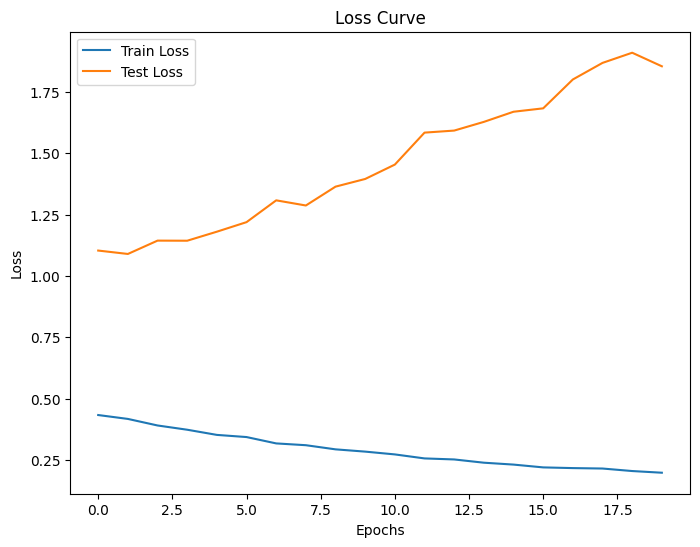

              precision    recall  f1-score   support

    airplane       0.71      0.75      0.73      1000
  automobile       0.88      0.75      0.81      1000
        bird       0.65      0.51      0.57      1000
         cat       0.49      0.57      0.53      1000
        deer       0.60      0.67      0.63      1000
         dog       0.60      0.58      0.59      1000
        frog       0.78      0.72      0.75      1000
       horse       0.73      0.73      0.73      1000
        ship       0.81      0.79      0.80      1000
       truck       0.72      0.83      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [ ]:
# 6. VISUALIZACIÓN DE MÉTRICAS
# Visualiza las curvas de pérdida
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

# 7. EVALUACIÓN FINAL
# Genera predicciones finales y evalúa el rendimiento
all_preds = []
all_labels = []

model.eval()  # Modo de evaluación
with torch.no_grad():  # No se calculan gradientes
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)  # Predicciones del modelo
        _, predicted = outputs.max(1)  # Predicción de la clase con mayor probabilidad
        all_preds.extend(predicted.cpu().numpy())  # Almacena las predicciones
        all_labels.extend(labels.cpu().numpy())  # Almacena las etiquetas verdaderas

# Imprime el informe de clasificación
print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))


# **EJEMPLO 3 TENSORFLOW**

In [ ]:
import tensorflow as tf  # Importa TensorFlow, una librería para machine learning y redes neuronales.
from tensorflow.keras import layers, models  # Importa módulos específicos para construir redes neuronales usando Keras.
import matplotlib.pyplot as plt  # Importa la librería para la visualización de gráficos.
from sklearn.metrics import classification_report  # Importa la función para generar un reporte de clasificación.

# 1. CARGA Y PREPROCESAMIENTO DE DATOS
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()  # Carga el dataset CIFAR-10, que contiene imágenes y etiquetas. Se divide en datos de entrenamiento y prueba.

# Normalización de datos
x_train = x_train.astype('float32') / 255.0  # Convierte las imágenes de entrenamiento a float32 y normaliza los valores de píxeles entre 0 y 1.
x_test = x_test.astype('float32') / 255.0  # Hace lo mismo para los datos de prueba.

# Codificación one-hot para las etiquetas
y_train = tf.keras.utils.to_categorical(y_train, 10)  # Codifica las etiquetas de entrenamiento en formato one-hot (10 clases).
y_test = tf.keras.utils.to_categorical(y_test, 10)  # Codifica las etiquetas de prueba en formato one-hot.

In [ ]:
# 2. DEFINICIÓN DE LA CNN
model = models.Sequential([  # Crea un modelo secuencial, donde las capas se agregan una tras otra.
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Crea una capa convolucional con 32 filtros, un tamaño de kernel de 3x3 y la función de activación ReLU.
    layers.MaxPooling2D((2, 2)),  # Crea una capa de max pooling con un tamaño de 2x2.
    layers.Conv2D(64, (3, 3), activation='relu'),  # Agrega otra capa convolucional con 64 filtros.
    layers.MaxPooling2D((2, 2)),  # Agrega otra capa de max pooling.
    layers.Flatten(),  # Aplana la salida para pasarla a una capa densa.
    layers.Dense(512, activation='relu'),  # Crea una capa densa con 512 neuronas y activación ReLU.
    layers.Dense(10, activation='softmax')  # Crea la capa de salida con 10 neuronas (una por clase) y activación softmax.
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,204,682 (4.60 MB)

 Trainable params: 1,204,682 (4.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilación del modelo
model.compile(optimizer='adam',  # Usa el optimizador Adam para el ajuste de los pesos.
              loss='categorical_crossentropy',  # Usa la función de pérdida de entropía cruzada categórica, adecuada para clasificación multi-clase.
              metrics=['accuracy'])  # Monitoriza la precisión durante el entrenamiento.

In [ ]:
# 3. ENTRENAMIENTO DEL MODELO
epochs = 50  # Establece el número de épocas para el entrenamiento.
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))  # Entrena el modelo usando los datos de entrenamiento y valida con los datos de prueba.

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9884 - loss: 0.0353 - val_accuracy: 0.7045 - val_loss: 2.1730
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9866 - loss: 0.0380 - val_accuracy: 0.7063 - val_loss: 2.2834
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9917 - loss: 0.0255 - val_accuracy: 0.7009 - val_loss: 2.3234
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9842 - loss: 0.0463 - val_accuracy: 0.7048 - val_loss: 2.4386
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9887 - loss: 0.0337 - val_accuracy: 0.6957 - val_loss: 2.4635
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9910 - loss: 0.0286 - val_accuracy: 0.7066 - val_loss: 2.4414
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9873 - loss: 0.0374 - val_accuracy: 0.6945 - val_loss: 2.5255
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9907 - loss: 0.0272 - val_accuracy: 0.

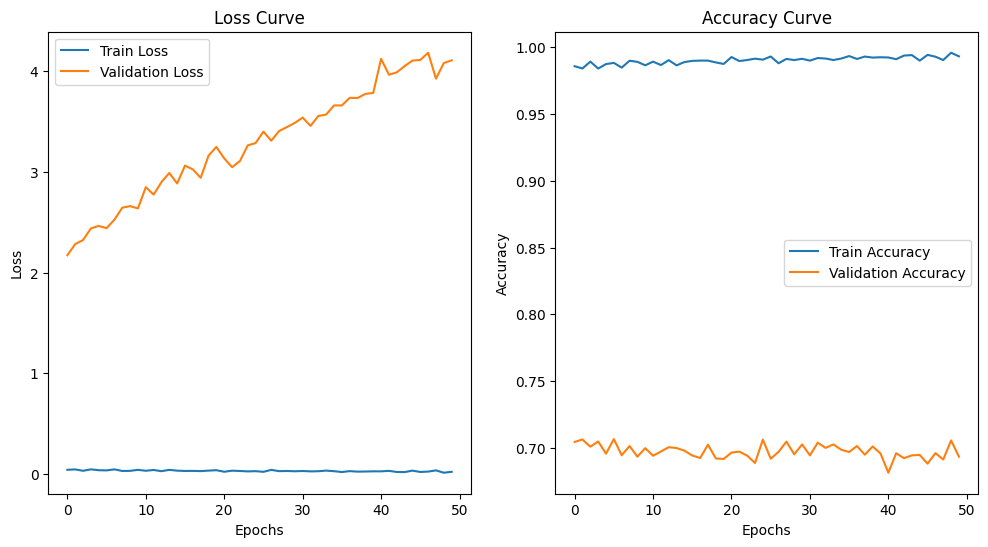

In [ ]:
# 4. VISUALIZACIÓN DE LAS MÉTRICAS
plt.figure(figsize=(12, 6))  # Establece el tamaño de la figura para la visualización.

# Curvas de pérdida
plt.subplot(1, 2, 1)  # Crea un subgráfico en la primera posición (de 2).
plt.plot(history.history['loss'], label='Train Loss')  # Dibuja la curva de pérdida de entrenamiento.
plt.plot(history.history['val_loss'], label='Validation Loss')  # Dibuja la curva de pérdida de validación.
plt.xlabel('Epochs')  # Etiqueta del eje X.
plt.ylabel('Loss')  # Etiqueta del eje Y.
plt.legend()  # Muestra la leyenda.
plt.title('Loss Curve')  # Título del gráfico.

# Curvas de precisión
plt.subplot(1, 2, 2)  # Crea un subgráfico en la segunda posición.
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Dibuja la curva de precisión de entrenamiento.
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Dibuja la curva de precisión de validación.
plt.xlabel('Epochs')  # Etiqueta del eje X.
plt.ylabel('Accuracy')  # Etiqueta del eje Y.
plt.legend()  # Muestra la leyenda.
plt.title('Accuracy Curve')  # Título del gráfico.

plt.show()  # Muestra los gráficos.


In [ ]:
# 5. EVALUACIÓN FINAL
predictions = model.predict(x_test)  # Realiza predicciones sobre el conjunto de prueba.
y_pred = tf.argmax(predictions, axis=1).numpy()  # Obtiene las etiquetas predichas tomando el índice del valor máximo en cada predicción (la clase más probable).
y_true = tf.argmax(y_test, axis=1).numpy()  # Obtiene las etiquetas reales tomando el índice del valor máximo en las etiquetas one-hot.

print(classification_report(y_true, y_pred, target_names=["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]))  # Imprime el reporte de clasificación con las métricas de precisión, recall, f1-score para cada clase.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    Airplane       0.76      0.75      0.76      1000
  Automobile       0.83      0.81      0.82      1000
        Bird       0.60      0.62      0.61      1000
         Cat       0.50      0.57      0.53      1000
        Deer       0.66      0.69      0.67      1000
         Dog       0.65      0.55      0.60      1000
        Frog       0.78      0.80      0.79      1000
       Horse       0.82      0.69      0.75      1000
        Ship       0.77      0.85      0.81      1000
       Truck       0.80      0.77      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

